In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gender_guesser.detector as gender
from tqdm.notebook import tqdm
from matplotlib.lines import Line2D

In [2]:
df = pd.read_csv('processed_data.csv')
df

gender  n_usa  citations
0           0      1  12.237111
1           0      0  11.188455
2           0      1  11.364402
3           0      1  11.534667
4           0      0  11.946285
...       ...    ...        ...
80205       0      1   6.424869
80206       0      1   5.257495
80207       0      1   5.598422
80208       0      1   5.036953
80209       0      1   8.488588

[80210 rows x 3 columns]

Text(0, 1, 'frequency')

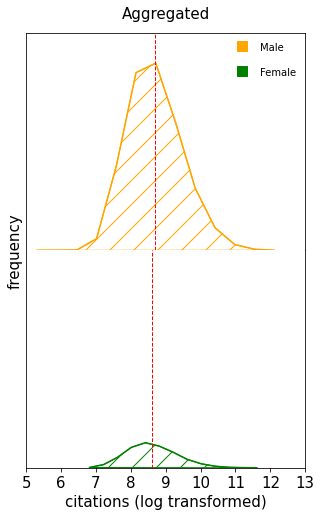

In [3]:
color = ['orange', 'green']
shape = ['o', '*']

summary = {
    (0, 0): {'mean': 0, 'std': 0, 'count': 0},
    (0, 1): {'mean': 0, 'std': 0, 'count': 0},
    (1, 0): {'mean': 0, 'std': 0, 'count': 0},
    (1, 1): {'mean': 0, 'std': 0, 'count': 0}
}

title = ['White', "Colored"]

fig, axis = plt.subplots(nrows=2, sharex=True, figsize=(5, 8))
# fig.suptitle('Aggregated', fontsize=15)
plt.subplots_adjust(hspace=0)
l = []

for i in [0, 1]:
    subset = df[(df['gender'] == i)]['citations']
    y, binEdges = np.histogram(subset, bins=13)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    axis[i].axis([5, 13, 0, 22000])
    axis[i].plot(bincenters, y, '-', c=color[i])
    axis[i].fill(bincenters, y, hatch='/', fill=False, color=color[i])
    axis[i].axvline(subset.mean(), color='r', linestyle='dashed', linewidth=1)
    # axis[i].get_yaxis().set_visible(False)
    axis[i].set_yticks([])
    axis[i].get_xaxis().set_visible(False) if i != 1 else axis[i].get_xaxis().set_visible(True)
    axis[i].spines['bottom'].set_visible(False) if i != 1 else axis[i].spines['top'].set_visible(False)

    if i == 0:
            colors = ['black', 'black']
            line = []
            lines = [
                Line2D([0], [0], color='orange', linewidth=0, marker='s', fillstyle='full', markersize=10),
                Line2D([0], [0], color='green', linewidth=0, marker='s', fillstyle='full', markersize=10)
            ]
            labels = ['Male', 'Female']
            axis[i].legend(lines, labels, loc=1, prop={'size': 10}, labelspacing=1.5, edgecolor='none')

plt.title('Aggregated', fontsize=15, y=2.04)
plt.xlabel('citations (log transformed)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('frequency', y=1, fontsize=15)

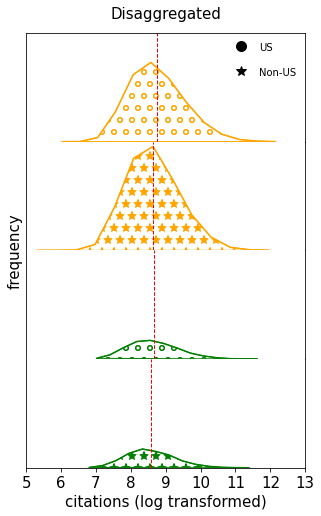

In [4]:
color = ['orange', 'green']
shape = ['o', '*']

summary = {
    (0, 0): {'mean': 0, 'std': 0},
    (0, 1): {'mean': 0, 'std': 0},
    (1, 0): {'mean': 0, 'std': 0},
    (1, 1): {'mean': 0, 'std': 0}
}

fig, axis = plt.subplots(nrows=4, sharex=True, figsize=(5, 8))
plt.subplots_adjust(hspace=0)

title = [['White Females', 'White Males'], ['Colored Females', 'Colored Males']]

iter = 0

for i in [0, 1]:
    for j in [0, 1]:
        subset = df[(df['gender'] == i) & (df['n_usa'] == j)]['citations']
        summary[(i, j)] = {'mean': np.mean(subset), 'std': np.std(subset), 'count': subset.shape[0]}

        y, binEdges = np.histogram(subset, bins=13)
        bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
        if i == 1:
            axis[iter].axis([5, 13, 0, 7000])
        else:
            axis[iter].axis([5, 13, 0, 11000])
        axis[iter].plot(bincenters, y, '-', c=color[i])
        axis[iter].fill(bincenters, y, hatch=shape[j], fill=False, color=color[i])
        axis[iter].axvline(subset.mean(), color='r', linestyle='dashed', linewidth=1)
        axis[iter].get_xaxis().set_visible(False) if iter != 3 else axis[iter].get_xaxis().set_visible(True)
        axis[iter].set_yticks([])
        if (i, j) in [(0, 1), (1, 0)]:
            axis[iter].spines['bottom'].set_visible(False)
            axis[iter].spines['top'].set_visible(False)
        elif (i, j) ==  (1,1):
            axis[iter].spines['top'].set_visible(False)

        if (i, j) == (0, 0):
            colors = ['black', 'black']
            line = []
            lines = [
                Line2D([0], [0], color='black', linewidth=0, marker='o', fillstyle='full', markersize=10),
                Line2D([0], [0], color='black', linewidth=0, marker='*', fillstyle='full', markersize=10)
            ]
            labels = ['US', 'Non-US']
            axis[iter].legend(lines, labels, loc=1, prop={'size': 10}, labelspacing=1.5, edgecolor='none')

        iter += 1

plt.title('Disaggregated', fontsize=15, y=4.08)
plt.xlabel('citations (log transformed)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('frequency', y=2, fontsize=15)
plt.show()

In [5]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['gender'], df['n_usa'])
print('Pearsons correlation: %.3f' % corr)
print('Pearsons correlation: ', _)

Pearsons correlation: -0.041
Pearsons correlation:  2.3489066921351946e-31


In [6]:
res_main = np.load('results_citations_main.npy', allow_pickle='TRUE').item()
res_pre = np.load('results_pre_citations.npy', allow_pickle='TRUE').item()
res_in = np.load('results_deltr_citations.npy', allow_pickle='TRUE').item()
res_post = np.load('results_fair_citations.npy', allow_pickle='TRUE').item()
res = [res_main, res_pre, res_in, res_post]
res

[{'agg': {'original': {0: [0.047382198952879644,
     0.05126139228233477,
     0.035215638055952264,
     0.03538094458987791,
     0.033250851824150315,
     0.028359231664205516,
     0.019414466400195236,
     0.02038947870208786,
     0.01034063338015585,
     0.006018191820320295,
     0.007677514286692088,
     0.011118668453419838,
     0.006459888993791718,
     0.0007437155146579983,
     0.004601799277339471,
     0.0049662824163376204,
     0.00262780183712902,
     0.0007642186506487781,
     0.0001924515275301364,
     -0.0006834308949000547],
    1: [-0.2893428063943161,
     -0.3130313795145056,
     -0.21504682706281283,
     -0.21605628330372997,
     -0.20304871859934023,
     -0.17317768820877172,
     -0.11855583567295018,
     -0.12450981843299783,
     -0.06314582160031187,
     -0.03675052127577421,
     -0.04688329328178872,
     -0.06789694874397363,
     -0.03944777683953063,
     -0.004541552290220127,
     -0.028101218322367578,
     -0.03032696083013926,
 

In [7]:
k_range = [i / 100 for i in range(1, 101, 5)]

def plot_aggregated(title, axis, results):
    colors = ['orange', 'green']
    styles = {'original': '-', 'debiased': '--'}
    for approach in ['original', 'debiased']:
        for group in [0, 1]:
            axis.plot(k_range, results[approach][group], color = colors[group], ls = styles[approach])

    axis.axhline(0, color='k', linestyle='dashed', linewidth=1)
    axis.set_xlabel('top k', fontsize=12)
    axis.set_ylabel('representation bias', fontsize=12)
    # axis.axis([0, 1, -.35, .35])
    axis.tick_params(labelsize=12)
    axis.set_title(title)

def plot_disaggregated(axis, results):
    groups = [(0,0),(0,1),(1,0),(1,1)]
    fill = {'original': 'full', 'debiased': 'none'}
    colors = ['orange', 'green']
    shapes = ['o', '*']
    for g in groups:
        for approach in ['original', 'debiased']:
            axis.plot(k_range, results[approach][g], shapes[g[1]], color = colors[g[0]], lw = 2, fillstyle = fill[approach])

    axis.axhline(0, color='k', linestyle='dashed', linewidth=1)
    axis.fill_between(k_range, results['debiased'][(0,1)], results['original'][(0,1)], color='orange', alpha=.25)
    # axis.axis([0, 1, -1.5, 6])
    axis.set_xlabel('top k', fontsize=12)
    axis.set_ylabel('representation bias', fontsize=12)
    axis.tick_params(labelsize=12)

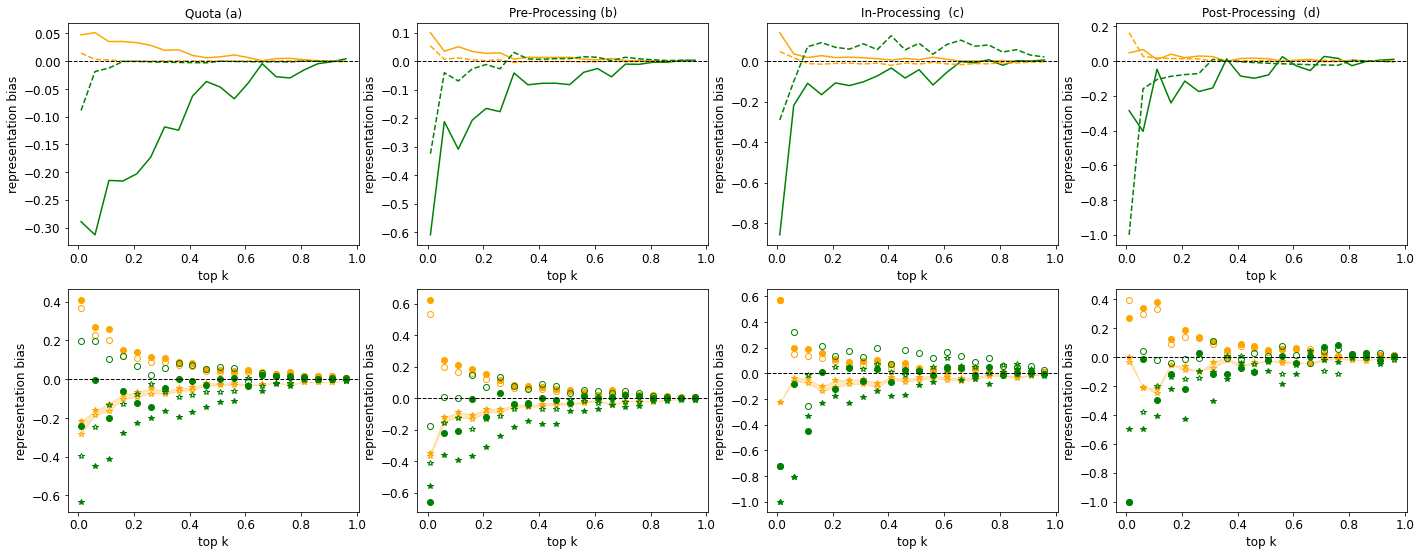

In [8]:
fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(24, 9))

titles = ['Quota (a)', 'Pre-Processing (b)', 'In-Processing  (c)', 'Post-Processing  (d)']

for i in range(4):
    plot_aggregated(titles[i], axis[0][i], res[i]['agg'])
    plot_disaggregated(axis[1][i], res[i]['diss_agg'])

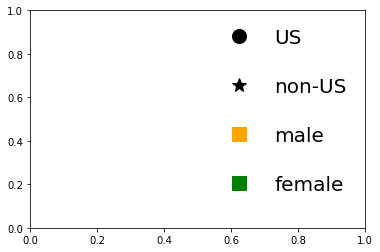

In [9]:
colors = ['black', 'black']
line = []
lines = [
    Line2D([0], [0], color='black', linewidth=0, marker='o', markersize=14),
    Line2D([0], [0], color='black', linewidth=0, marker='*', markersize=14),
    Line2D([0], [0], color='orange', linewidth=0, marker='s', fillstyle='full', markersize=14),
    Line2D([0], [0], color='green', linewidth=0, marker='s', fillstyle='full', markersize=14)
]
labels = ['US', 'non-US', 'male', 'female']
plt.legend(lines, labels, loc=1, prop={'size': 20}, labelspacing=1.5, edgecolor='none')
plt.show()